### Loading the dataset

In [1]:
import pandas as pd

In [3]:
auto_df = pd.read_csv( "./data/Auto.csv" )

In [4]:
auto_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
auto_df[auto_df.horsepower.str.isnumeric() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


### Data Clean Up

In [8]:
auto_df['horsepower'] = pd.to_numeric( auto_df['horsepower'],
                                       errors = 'coerce')

In [9]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [10]:
auto_df.to_csv( "cars_updated.csv", index = False )

## Adding a new variable

In [27]:
auto_df['acceleration_new'] = round(60.0 / auto_df.acceleration, 2)

In [28]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,acceleration_new
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,5.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,5.22
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,5.45
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,5.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,5.71
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,3.85
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,2.44
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,5.17
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,3.23


## Unique Values

In [11]:
### Used mostly for categorical or discrete values
auto_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [ ]:
auto_df.origin.unique()

Origin: 
- 1 - American
- 2 - European
- 3 - Japanese

## Insights

#### Which origin (American vs Japanese) manufacturers were producing cars with higher fuel efficiency during 1970-1982?

#### Comparison between American and Japanese

In [12]:
american_cars = auto_df[auto_df.origin == 1]
european_cars = auto_df[auto_df.origin == 2]
japanese_cars = auto_df[auto_df.origin == 3]

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

- Overlapped Distribtion plot can be used to compare one numerican with one categorical vaariable.

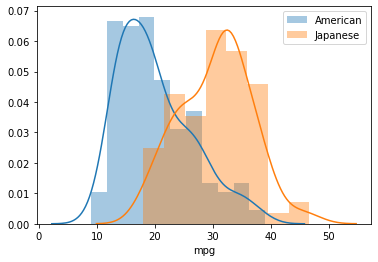

In [14]:
sn.distplot( american_cars['mpg'], label = 'American' )
#sn.distplot( european_cars['mpg'], label = 'European' )
sn.distplot( japanese_cars['mpg'], label = 'Japanese' );
plt.legend();

### Question 1:

Between all origins, compare the mpgs of cars.

### Which origin (A/E/J) manufacturers were producing cars with more power?

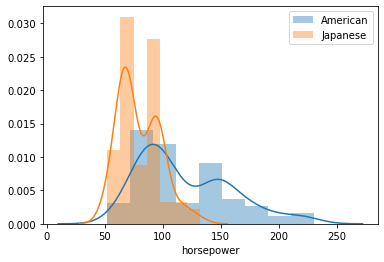

In [17]:
sn.distplot( american_cars['horsepower'].dropna(), 
            label = 'American' )
sn.distplot( japanese_cars['horsepower'].dropna(), 
            label = 'Japanese' );
plt.legend();

### Scatter Plot

Compare two numerical variables

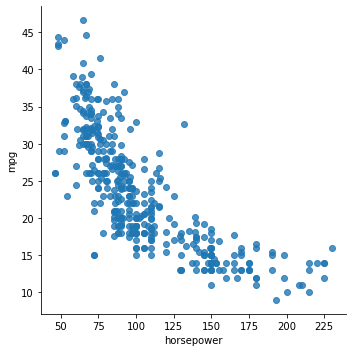

In [18]:
sn.lmplot( data = auto_df,
           x = 'horsepower',
           y = 'mpg',
           fit_reg = False );

### Question 2:

Find two variables who has positive correlation among the following ones.

- mpg
- weight
- displacement
- acceleration
- horsepower

### Finding Correlation between Variables

mpg, weight, acceleration, displcement, horsepower

In [29]:
### The columns are numerical variables
auto_df[['mpg', 
         'weight', 
         'acceleration_new', 
         'displacement', 
         'horsepower']].corr()

,mpg,weight,acceleration_new,displacement,horsepower
mpg,1.000000,-0.831739,-0.438215,-0.804443,-0.778427
weight,-0.831739,1.000000,0.456642,0.933104,0.864538
acceleration_new,-0.438215,0.456642,1.000000,0.603306,0.736379
displacement,-0.804443,0.933104,0.603306,1.000000,0.897257
horsepower,-0.778427,0.864538,0.736379,0.897257,1.000000


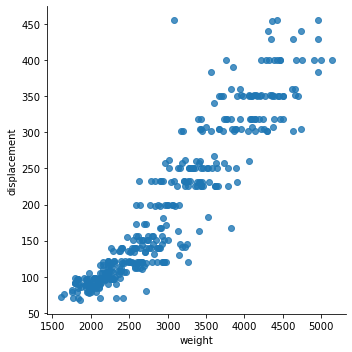

In [20]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'displacement',
           fit_reg = False );

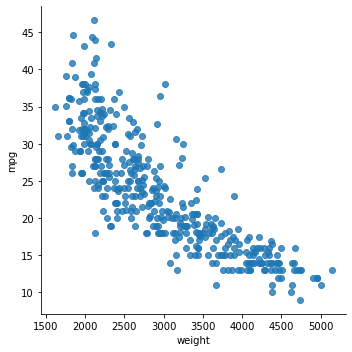

In [21]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'mpg',
           fit_reg = False );

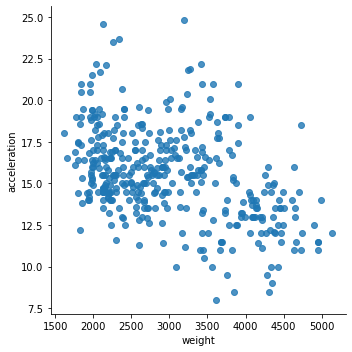

In [22]:
sn.lmplot( data = auto_df,
           x = 'weight',
           y = 'acceleration',
           fit_reg = False );

In [23]:
corr_mat = auto_df[['mpg', 
                    'weight', 
                    'acceleration', 
                    'displacement', 
                    'horsepower']].corr()

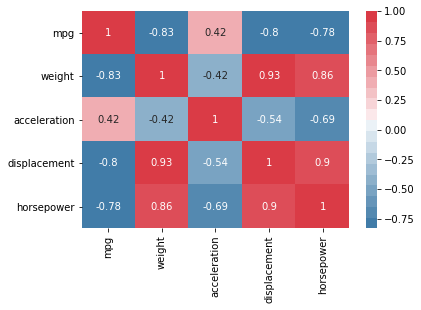

In [24]:
sn.heatmap( corr_mat,
            annot = True,
            cmap = sn.diverging_palette( 240, 10, n = 20 ) );

### Discussion 

- 13, 14, 15, 16, 17 - Mean: 15, std 
- 5, 10, 15, 20, 25 - Mean: 15, std

### Basic Statistics

In [30]:
american_cars.mpg.mean()

20.071774193548382

In [31]:
japanese_cars.mpg.mean()

30.450632911392397

In [32]:
american_cars.mpg.std()

6.413145160339849

In [33]:
japanese_cars.mpg.std()

6.090048069738324

In [34]:
from scipy import stats

In [35]:
stats.norm.interval( 0.8,
                     american_cars.mpg.mean(),
                     american_cars.mpg.std() )

(11.852997973250071, 28.290550413846695)

In [36]:
stats.norm.interval( 0.8,
                     japanese_cars.mpg.mean(),
                     japanese_cars.mpg.std() )

(22.645922273377376, 38.255343549407414)

## Rules for plotting


### Studying one variable at a time: Univariate Analysis

- Numerical -> Histogram
- Categorical -> Bar Plot

### Studying two variables: Bivariate Analysis

- Numerical, Numerical -> Scatter Plot
- Numerical, Categorical -> Overlapped Distribution Plot
- Categorical, Categorical -> Bar Plot

### Many Variable - Multivariate

- All Numerical -> Heatmap
- Mathematical Expression







